# Build a model using publicly available data for key *national* demand & supply factors that could influence US home prices. Use that to explain how these factors impacted home prices over the last 20 years. 

#### You can use the S&P Case-Schiller Home Price Index as a proxy for home prices:
 fred.stlouisfed.org/series/CSUSHPISA.

#### Definitions

##### A national factor is one that impacts home prices nationally. 

##### For example: The US unemployment rate is a national factor, Boston's unemployment rate is NOT a national factor , Avg. no of bedrooms in California is not a national factor

##### A demand factor is one that primarily impacts demand for homes from consumers, (Ex. Unemployment rate)

##### A supply factor is one that primarily impacts the supply of homes (ie. total homes available for sale) (Ex. Availability of land)

In [2]:
import pandas as pd

In [3]:
price= pd.read_csv('CSUSHPISA.csv')

In [4]:
price

,DATE,CSUSHPISA
0,2001-01-01,109.846
1,2001-02-01,110.500
2,2001-03-01,111.108
3,2001-04-01,111.651
4,2001-05-01,112.163
...,...,...
252,2022-01-01,284.767
253,2022-02-01,290.371
254,2022-03-01,296.496
255,2022-04-01,301.704


In [5]:
unemp_rate=pd.read_csv('U2RATE.csv')

In [6]:
unemp_rate

,DATE,U2RATE
0,2001-01-01,1.9
1,2001-02-01,2.0
2,2001-03-01,2.1
3,2001-04-01,2.1
4,2001-05-01,2.2
...,...,...
254,2022-03-01,1.7
255,2022-04-01,1.7
256,2022-05-01,1.7
257,2022-06-01,1.6


In [7]:
#New Houses for Sale by Stage of Construction, Not Started
constr_not_startd= pd.read_csv('NHFSEPNTS.csv')  # thousands of units

In [8]:
constr_not_startd

,DATE,NHFSEPNTS
0,2001-01-01,41.0
1,2001-02-01,41.0
2,2001-03-01,44.0
3,2001-04-01,39.0
4,2001-05-01,42.0
...,...,...
254,2022-03-01,98.0
255,2022-04-01,100.0
256,2022-05-01,100.0
257,2022-06-01,99.0


In [9]:
#New Houses for Sale by Stage of Construction, Under Construction
undr_constrtn = pd.read_csv('NHFSEPUCS.csv')    # thousands of units

In [10]:
undr_constrtn

,DATE,NHFSEPUCS
0,2001-01-01,173.0
1,2001-02-01,175.0
2,2001-03-01,170.0
3,2001-04-01,178.0
4,2001-05-01,177.0
...,...,...
254,2022-03-01,281.0
255,2022-04-01,298.0
256,2022-05-01,305.0
257,2022-06-01,311.0


In [11]:
# New Houses for Sale by Stage of Construction, Completed
cnstr_cmplt= pd.read_csv('NHFSEPCS.csv') # thousands of units

In [12]:
cnstr_cmplt

,DATE,NHFSEPCS
0,2001-01-01,82.0
1,2001-02-01,80.0
2,2001-03-01,78.0
3,2001-04-01,77.0
4,2001-05-01,76.0
...,...,...
254,2022-03-01,32.0
255,2022-04-01,34.0
256,2022-05-01,37.0
257,2022-06-01,40.0


In [13]:
df= pd.merge(cnstr_cmplt,undr_constrtn,on='DATE',how='inner')

In [14]:
df1=pd.merge(constr_not_startd,unemp_rate,on='DATE',how='inner')

In [15]:
df2=pd.merge(df,df1,on='DATE',how='inner')

In [16]:
df2

,DATE,NHFSEPCS,NHFSEPUCS,NHFSEPNTS,U2RATE
0,2001-01-01,82.0,173.0,41.0,1.9
1,2001-02-01,80.0,175.0,41.0,2.0
2,2001-03-01,78.0,170.0,44.0,2.1
3,2001-04-01,77.0,178.0,39.0,2.1
4,2001-05-01,76.0,177.0,42.0,2.2
...,...,...,...,...,...
254,2022-03-01,32.0,281.0,98.0,1.7
255,2022-04-01,34.0,298.0,100.0,1.7
256,2022-05-01,37.0,305.0,100.0,1.7
257,2022-06-01,40.0,311.0,99.0,1.6


In [17]:
data=pd.merge(df2,price,on='DATE',how='inner')

In [18]:
data

,DATE,NHFSEPCS,NHFSEPUCS,NHFSEPNTS,U2RATE,CSUSHPISA
0,2001-01-01,82.0,173.0,41.0,1.9,109.846
1,2001-02-01,80.0,175.0,41.0,2.0,110.500
2,2001-03-01,78.0,170.0,44.0,2.1,111.108
3,2001-04-01,77.0,178.0,39.0,2.1,111.651
4,2001-05-01,76.0,177.0,42.0,2.2,112.163
...,...,...,...,...,...,...
252,2022-01-01,32.0,267.0,95.0,2.0,284.767
253,2022-02-01,32.0,269.0,95.0,1.9,290.371
254,2022-03-01,32.0,281.0,98.0,1.7,296.496
255,2022-04-01,34.0,298.0,100.0,1.7,301.704


In [19]:
data.rename(columns = {'NHFSEPCS':'Cnstr_Cmplt', 'NHFSEPUCS':'Undr_Cnstr','NHFSEPNTS':'Cnstr_Not_Strtd','U2RATE':'Unemp_Rate','CSUSHPISA':'Prc_Indx'}, inplace = True)

In [20]:
data

,DATE,Cnstr_Cmplt,Undr_Cnstr,Cnstr_Not_Strtd,Unemp_Rate,Prc_Indx
0,2001-01-01,82.0,173.0,41.0,1.9,109.846
1,2001-02-01,80.0,175.0,41.0,2.0,110.500
2,2001-03-01,78.0,170.0,44.0,2.1,111.108
3,2001-04-01,77.0,178.0,39.0,2.1,111.651
4,2001-05-01,76.0,177.0,42.0,2.2,112.163
...,...,...,...,...,...,...
252,2022-01-01,32.0,267.0,95.0,2.0,284.767
253,2022-02-01,32.0,269.0,95.0,1.9,290.371
254,2022-03-01,32.0,281.0,98.0,1.7,296.496
255,2022-04-01,34.0,298.0,100.0,1.7,301.704


In [21]:
data.describe()

,Cnstr_Cmplt,Undr_Cnstr,Cnstr_Not_Strtd,Unemp_Rate,Prc_Indx
count,257.000000,257.000000,257.000000,257.000000,257.000000
mean,83.400778,179.066148,51.657588,3.320233,171.519140
std,42.392959,68.117370,21.506709,1.601726,38.545539
min,32.000000,70.000000,22.000000,1.500000,109.846000
25%,54.000000,117.000000,36.000000,2.200000,143.912000
50%,76.000000,182.000000,48.000000,2.800000,166.658000
75%,93.000000,219.000000,62.000000,4.000000,186.793000
max,194.000000,338.000000,100.000000,13.200000,304.831000


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257 entries, 0 to 256
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DATE             257 non-null    object 
 1   Cnstr_Cmplt      257 non-null    float64
 2   Undr_Cnstr       257 non-null    float64
 3   Cnstr_Not_Strtd  257 non-null    float64
 4   Unemp_Rate       257 non-null    float64
 5   Prc_Indx         257 non-null    float64
dtypes: float64(5), object(1)
memory usage: 14.1+ KB


In [23]:
data.duplicated().sum()

0

In [24]:
data.isnull().sum()

DATE               0
Cnstr_Cmplt        0
Undr_Cnstr         0
Cnstr_Not_Strtd    0
Unemp_Rate         0
Prc_Indx           0
dtype: int64

In [25]:
data.nunique()

DATE               257
Cnstr_Cmplt        105
Undr_Cnstr         150
Cnstr_Not_Strtd     72
Unemp_Rate          55
Prc_Indx           257
dtype: int64

# EDA

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
data['year'] = pd.DatetimeIndex(data['DATE']).year 

In [32]:
data

,DATE,Cnstr_Cmplt,Undr_Cnstr,Cnstr_Not_Strtd,Unemp_Rate,Prc_Indx,year
0,2001-01-01,82.0,173.0,41.0,1.9,109.846,2001
1,2001-02-01,80.0,175.0,41.0,2.0,110.500,2001
2,2001-03-01,78.0,170.0,44.0,2.1,111.108,2001
3,2001-04-01,77.0,178.0,39.0,2.1,111.651,2001
4,2001-05-01,76.0,177.0,42.0,2.2,112.163,2001
...,...,...,...,...,...,...,...
252,2022-01-01,32.0,267.0,95.0,2.0,284.767,2022
253,2022-02-01,32.0,269.0,95.0,1.9,290.371,2022
254,2022-03-01,32.0,281.0,98.0,1.7,296.496,2022
255,2022-04-01,34.0,298.0,100.0,1.7,301.704,2022


In [33]:
dd=data.groupby(by='year', as_index=False).mean()  # mean values of each factors on the yearly basis

In [34]:
dd   

,year,Cnstr_Cmplt,Undr_Cnstr,Cnstr_Not_Strtd,Unemp_Rate,Prc_Indx
0,2001,77.583333,182.333333,41.833333,2.416667,113.179000
1,2002,82.500000,199.000000,46.000000,3.183333,122.278833
2,2003,80.833333,213.916667,53.666667,3.316667,133.731333
3,2004,89.916667,243.250000,62.166667,2.850000,150.440167
4,2005,106.750000,279.500000,81.416667,2.433333,171.736750
5,2006,144.083333,318.166667,91.083333,2.191667,183.447833
6,2007,185.416667,267.166667,78.500000,2.291667,179.919250
7,2008,179.083333,190.416667,56.000000,3.116667,164.057917
8,2009,128.000000,115.750000,35.083333,5.958333,148.544000
9,2010,86.500000,97.083333,27.750000,5.991667,144.672167


#### From 2001 to 2019  the mean number of houses where construction was completed were greater than the mean number of houses where construction was not started, but from 2020 the scenario became opposite

####  Mean number of Houses at under construction stage were always greater than the mean number of houses where construction is completed or not started  except in the year 2009 when the unemployment rate was incresing throughout the year

####  Unemployment rate was high for three consecutive years from 2009 to 2011 which impacted the price of houses available for sale (price became Low) and also the availablity of new houses for sale also went down.

#### In the year 2020 there was a sudden increase in the Unemployment Rate but there was no effect on the house prices, but the  number of houses whose construction were completed went down because of the Unemployment rate. 


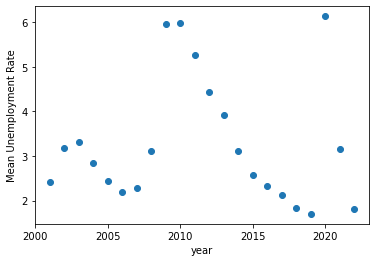

In [35]:
plt.scatter(dd.year,dd.Unemp_Rate)
plt.xlabel('year')
plt.ylabel('Mean Unemployment Rate')
plt.show()

#### the first peak in unemployment rate came in the year 2009 and started to decrease slowly from 2011and became lewest in the year 2019 and again the second peak was seen in 2020. 

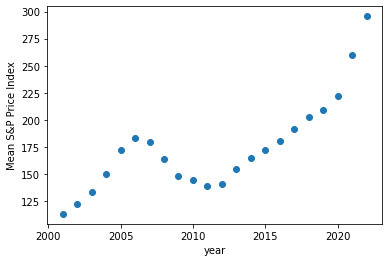

In [36]:
plt.scatter(dd.year,dd.Prc_Indx)
plt.xlabel('year')
plt.ylabel('Mean S&P Price Index')
plt.show()

#### The price of house kept on increasing from year 2001 to 2006 and started gradually decreasing from 2007 to 2012 ( in the same year the unemployment rate started increasing ), after 2020 there was large difference in the price of house.    

In [37]:
dMax=data.groupby(by='year', as_index=False).max()   # max values of each factors on the yearly basis
dMax

,year,DATE,Cnstr_Cmplt,Undr_Cnstr,Cnstr_Not_Strtd,Unemp_Rate,Prc_Indx
0,2001,2001-12-01,82.0,191.0,45.0,3.1,116.453
1,2002,2002-12-01,86.0,204.0,52.0,3.3,127.622
2,2003,2003-12-01,86.0,232.0,61.0,3.5,140.180
3,2004,2004-12-01,97.0,257.0,70.0,3.1,159.330
4,2005,2005-12-01,110.0,306.0,95.0,2.7,180.910
5,2006,2006-12-01,166.0,338.0,100.0,2.3,184.364
6,2007,2007-12-01,194.0,285.0,85.0,2.5,184.599
7,2008,2008-12-01,191.0,227.0,69.0,4.3,173.133
8,2009,2009-12-01,161.0,139.0,41.0,6.5,151.504
9,2010,2010-12-01,96.0,109.0,31.0,6.2,147.395


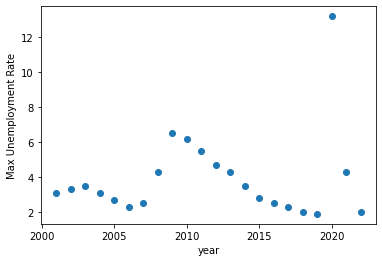

In [38]:
plt.scatter(dMax.year,dMax.Unemp_Rate)
plt.xlabel('year')
plt.ylabel('Max Unemployment Rate')
plt.show()

#### Maximum Unemploylent Rate was seen in the year 2020

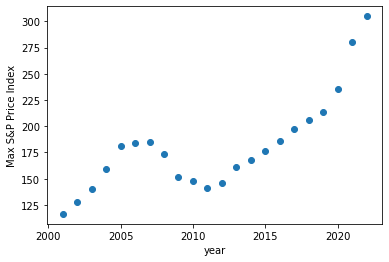

In [39]:
plt.scatter(dMax.year,dMax.Prc_Indx)
plt.xlabel('year')
plt.ylabel('Max S&P Price Index')
plt.show()

In [40]:
dMin=data.groupby(by='year', as_index=False).min()  # min values of each factors on the yearly basis
dMin

,year,DATE,Cnstr_Cmplt,Undr_Cnstr,Cnstr_Not_Strtd,Unemp_Rate,Prc_Indx
0,2001,2001-01-01,75.0,170.0,39.0,1.9,109.846
1,2002,2002-01-01,77.0,190.0,40.0,3.1,117.143
2,2003,2003-01-01,77.0,202.0,51.0,3.1,128.461
3,2004,2004-01-01,82.0,231.0,54.0,2.7,141.646
4,2005,2005-01-01,102.0,264.0,70.0,2.3,161.288
5,2006,2006-01-01,113.0,290.0,80.0,2.1,182.320
6,2007,2007-01-01,169.0,234.0,72.0,2.1,174.341
7,2008,2008-01-01,166.0,145.0,42.0,2.5,153.618
8,2009,2009-01-01,96.0,106.0,29.0,4.8,147.696
9,2010,2010-01-01,77.0,86.0,26.0,5.7,142.061


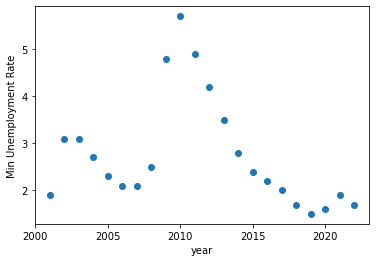

In [41]:
plt.scatter(dMin.year,dMin.Unemp_Rate)
plt.xlabel('year')
plt.ylabel('Min Unemployment Rate')
plt.show()

#### Minimum Unemployment Rate was seen in the year 2019 

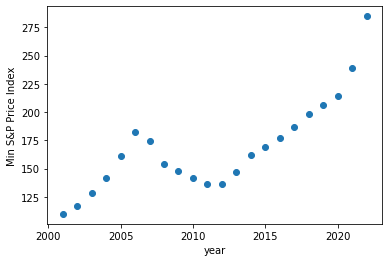

In [42]:
plt.scatter(dMin.year,dMin.Prc_Indx)
plt.xlabel('year')
plt.ylabel('Min S&P Price Index')
plt.show()

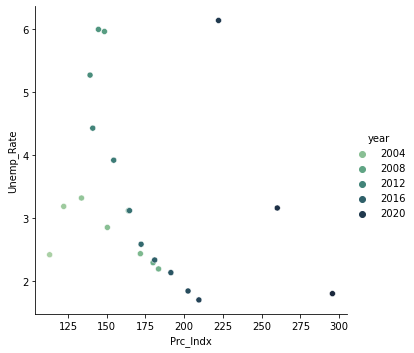

In [43]:
sns.relplot(x="Prc_Indx", y="Unemp_Rate", hue="year", palette="ch:r=-.5,l=.75", data=dd);


In [44]:
data[data['year']==2011]   # All the features value in the year 2011

,DATE,Cnstr_Cmplt,Undr_Cnstr,Cnstr_Not_Strtd,Unemp_Rate,Prc_Indx,year
120,2011-01-01,75.0,84.0,28.0,5.5,141.526,2011
121,2011-02-01,74.0,82.0,27.0,5.5,140.356,2011
122,2011-03-01,72.0,82.0,25.0,5.4,139.987,2011
123,2011-04-01,69.0,79.0,25.0,5.4,140.011,2011
124,2011-05-01,67.0,77.0,24.0,5.4,139.904,2011
125,2011-06-01,65.0,78.0,23.0,5.3,139.860,2011
126,2011-07-01,66.0,77.0,23.0,5.3,139.727,2011
127,2011-08-01,64.0,75.0,23.0,5.2,139.306,2011
128,2011-09-01,62.0,74.0,24.0,5.2,138.667,2011
129,2011-10-01,59.0,75.0,24.0,5.1,137.954,2011


In [45]:
new=pd.read_csv('HNFSEPUSSA.csv')  # Total number of houses for sale

In [46]:
new.head(12)

,DATE,HNFSEPUSSA
0,2001-01-01,296.0
1,2001-02-01,296.0
2,2001-03-01,292.0
3,2001-04-01,294.0
4,2001-05-01,295.0
5,2001-06-01,301.0
6,2001-07-01,305.0
7,2001-08-01,308.0
8,2001-09-01,310.0
9,2001-10-01,308.0


In [47]:
new.describe()

,HNFSEPUSSA
count,259.000000
mean,315.227799
std,113.476043
min,142.000000
25%,221.000000
50%,309.000000
75%,381.000000
max,572.000000


In [48]:
new['year']=  pd.DatetimeIndex(new['DATE']).year 

In [49]:
dd1=new.groupby(by='year',as_index=False).mean()

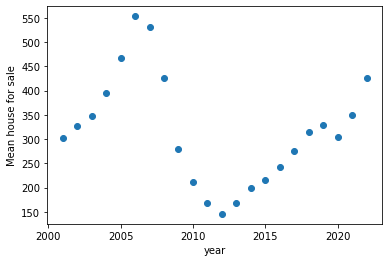

In [131]:
plt.scatter(dd1.year,dd1.HNFSEPUSSA)
plt.xlabel('year')
plt.ylabel('Mean house for sale')
plt.show()

#### Maximum number of houses were available in 2006 and least in 2012


In [51]:
dd1mx=new.groupby(by='year',as_index=False).max()
dd1mx

,year,DATE,HNFSEPUSSA
0,2001,2001-12-01,310.0
1,2002,2002-12-01,339.0
2,2003,2003-12-01,370.0
3,2004,2004-12-01,422.0
4,2005,2005-12-01,511.0
5,2006,2006-12-01,572.0
6,2007,2007-12-01,548.0
7,2008,2008-12-01,487.0
8,2009,2009-12-01,341.0
9,2010,2010-12-01,233.0


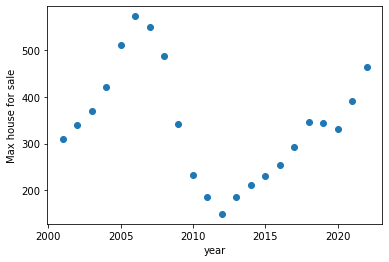

In [132]:
plt.scatter(dd1mx.year,dd1mx.HNFSEPUSSA)
plt.xlabel('year')
plt.ylabel('Max house for sale')
plt.show()

In [53]:
dd1mn=new.groupby(by='year',as_index=False).min()
dd1mn

,year,DATE,HNFSEPUSSA
0,2001,2001-01-01,292.0
1,2002,2002-01-01,310.0
2,2003,2003-01-01,338.0
3,2004,2004-01-01,372.0
4,2005,2005-01-01,441.0
5,2006,2006-01-01,523.0
6,2007,2007-01-01,497.0
7,2008,2008-01-01,353.0
8,2009,2009-01-01,234.0
9,2010,2010-01-01,190.0


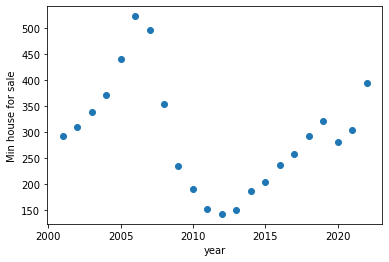

In [133]:
plt.scatter(dd1mn.year,dd1mn.HNFSEPUSSA)
plt.xlabel('year')
plt.ylabel('Min house for sale')
plt.show()

In [55]:
data.corr()

,Cnstr_Cmplt,Undr_Cnstr,Cnstr_Not_Strtd,Unemp_Rate,Prc_Indx,year
Cnstr_Cmplt,1.000000,0.446239,0.339777,-0.073100,-0.191025,-0.514312
Undr_Cnstr,0.446239,1.000000,0.929134,-0.512028,0.384182,-0.231428
Cnstr_Not_Strtd,0.339777,0.929134,1.000000,-0.410450,0.618053,0.017901
Unemp_Rate,-0.073100,-0.512028,-0.410450,1.000000,-0.228339,0.006763
Prc_Indx,-0.191025,0.384182,0.618053,-0.228339,1.000000,0.783208
year,-0.514312,-0.231428,0.017901,0.006763,0.783208,1.000000


In [56]:
df=pd.merge(new,data,on='DATE',how ='inner')

In [57]:
df=df.drop(columns=['year_x','year_y','Cnstr_Cmplt','Undr_Cnstr','Cnstr_Not_Strtd'],axis=1)


In [58]:
df.rename(columns={'HNFSEPUSSA':'ttl_homes_avlbl_for_sale'},inplace=True)

In [59]:
df.drop(columns=['DATE'],axis=1,inplace=True)

In [60]:
df

,ttl_homes_avlbl_for_sale,Unemp_Rate,Prc_Indx
0,296.0,1.9,109.846
1,296.0,2.0,110.500
2,292.0,2.1,111.108
3,294.0,2.1,111.651
4,295.0,2.2,112.163
...,...,...,...
252,394.0,2.0,284.767
253,396.0,1.9,290.371
254,411.0,1.7,296.496
255,432.0,1.7,301.704


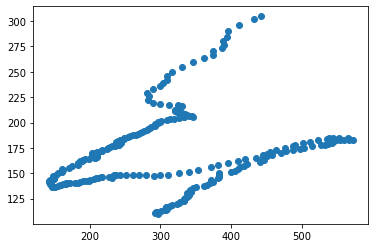

In [71]:
plt.scatter(df.ttl_homes_avlbl_for_sale,df.Prc_Indx)

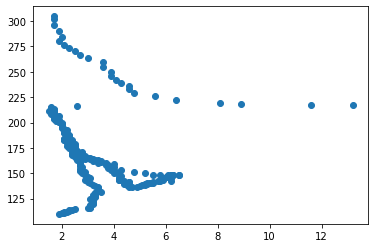

In [72]:
plt.scatter(df.Unemp_Rate,df.Prc_Indx)

# Model Building

In [62]:
X=df.drop(columns=['Prc_Indx'],axis=1)
Y=df['Prc_Indx']

In [63]:
from sklearn.model_selection import train_test_split
Xtr,Xts,Ytr,Yts = train_test_split(X,Y,test_size=0.2)

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [65]:
lr=LinearRegression()

In [66]:
lr.fit(Xtr,Ytr)

LinearRegression()

In [67]:
yprd=lr.predict(Xts)

In [68]:
score=[]
for i in range(1000):
    Xtr,Xts,Ytr,Yts = train_test_split(X,Y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    lr.fit(Xtr,Ytr)
    yprd=lr.predict(Xts)
    score.append(r2_score(Yts,yprd))

In [69]:
import numpy as np
np.argmax(score)

886

In [70]:
score[np.argmax(score)]

0.19875504254953147

#### Since the realtion between dependent and independent  variable is not linear  LR model is not giving good result

#### Therefor we are using Random forest regressor

In [129]:
from sklearn.ensemble import RandomForestRegressor
regressor1 = RandomForestRegressor(n_estimators = 100,max_depth=9,random_state = 0)
regressor1.fit(Xtr, Ytr) 

RandomForestRegressor(max_depth=9, random_state=0)

In [130]:
Y_pred = regressor1.predict(Xts)

r2_score(Yts,Y_pred)

0.9447042593085252

In [75]:
scoree=[]
for i in range(1000):
    Xtr,Xts,Ytr,Yts = train_test_split(X,Y,test_size=0.2,random_state=i)
    regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
    regressor.fit(Xtr, Ytr) 
    yprd=regressor.predict(Xts)
    scoree.append(r2_score(Yts,yprd))

In [76]:
np.argmax(scoree)


954

In [77]:
scoree[np.argmax(scoree)]

0.9417329306082246

### regressor1 model gives better prediction   